In [2]:
import pandas as pd 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_insure = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Health%20Insurance%20Cost%20Prediction/insurance.csv")

In [5]:
print(f"Rows, columns: {df_insure.shape}\n")

print(df_insure.head())

Rows, columns: (1338, 7)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [6]:
df_insure.duplicated().sum()

1

In [7]:
print(df_insure[df_insure.duplicated(keep = "last")],"\n")
print(df_insure[df_insure.duplicated(keep = "first")])

     age   sex    bmi  children smoker     region    charges
195   19  male  30.59         0     no  northwest  1639.5631 

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [8]:
mask = ~ df_insure.duplicated()
df_insure = df_insure[mask]
print(f"Rows, columns: {df_insure.shape}")

Rows, columns: (1337, 7)


In [9]:
df_insure.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
print(df_insure.sex.unique(), "\n")
print(df_insure.smoker.unique(),"\n")
print(df_insure.region.unique())

['female' 'male'] 

['yes' 'no'] 

['southwest' 'southeast' 'northwest' 'northeast']


In [11]:
print(f"Unique values for the age column:\n{df_insure.age.unique()}\n")
print(f"Unique values for the bmi column:\n{df_insure.bmi.unique()}\n")
print(f"Total number of unique values in the bmi column: {df_insure.bmi.nunique()}\n")
print(f"Unique values for the children column:\n{df_insure.children.unique()}")

Unique values for the age column:
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]

Unique values for the bmi column:
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35

In [12]:
df_insure.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
class OutlierBoundary:
    """The class accepts one argument and returns the upper and lower boundaries.
    """
    def __init__(self, dataset):
        """Initiates the class
        """
        self.dataset = dataset

    def outlier(self):
        """The function detects the upper and lower class boundaries
        """
        
        column_list = ["age", "bmi", "children", "charges"] 
        
        for column in self.dataset:
            
            if column in column_list:
                
                des = self.dataset[column].describe()
                
                desPairs = {"count":0,"mean":1,"std":2,"min":3,"25":4,"50":5,"75":6,"max":7}
                
                Q1 = des[desPairs["25"]]
                Q3 = des[desPairs["75"]]
                
                IQR = Q3-Q1
                
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                
                print(f"The upper boundary for the {column} column is {upper} and the lower boundary is {lower}.")

In [14]:
p = OutlierBoundary(df_insure)
p.outlier()

The upper boundary for the age column is 87.0 and the lower boundary is -9.0.
The upper boundary for the bmi column is 47.31500000000001 and the lower boundary is 13.674999999999994.
The upper boundary for the children column is 5.0 and the lower boundary is -3.0.
The upper boundary for the charges column is 34524.777625 and the lower boundary is -13120.716174999998.


In [15]:
print("The total number of outliers that can be removed is:",
      len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72]))

print("This is about", ((len(df_insure[df_insure.age > 87.0]) +
      len(df_insure[df_insure.age < -9.0]) +
      len(df_insure[df_insure.bmi > 47.315]) +
      len(df_insure[df_insure.bmi < 13.675]) +
      len(df_insure[df_insure.children > 5.0]) +
      len(df_insure[df_insure.children < -3.0]) +
      len(df_insure[df_insure.charges > 34524.78]) +
      len(df_insure[df_insure.charges < -13120.72])) / 1337) * 100, "% of the dataset.")

The total number of outliers that can be removed is: 148
This is about 11.06955871353777 % of the dataset.


In [16]:
print(f"Variable distribution for the sex column:\n{df_insure.sex.value_counts(normalize = True)}\n")
print(f"Variable distribution for the smoker column:\n{df_insure.smoker.value_counts(normalize = True)}\n")
print(f"Variable distribution for the region column:\n{df_insure.region.value_counts(normalize = True)}")

Variable distribution for the sex column:
male      0.504862
female    0.495138
Name: sex, dtype: float64

Variable distribution for the smoker column:
no     0.795064
yes    0.204936
Name: smoker, dtype: float64

Variable distribution for the region column:
southeast    0.272251
southwest    0.243082
northwest    0.242334
northeast    0.242334
Name: region, dtype: float64


In [17]:
df_insure.groupby("sex")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
sex,,,,,
female,1607.5101,12569.578844,9412.9625,63770.42801,662
male,1121.8739,13974.998864,9377.9047,62592.87309,675


In [18]:
df_insure.groupby("smoker")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
smoker,,,,,
no,1121.8739,8440.660307,7345.72660,36910.60803,1063
yes,12829.4551,32050.231832,34456.34845,63770.42801,274


In [19]:
df_insure.groupby("region")["charges"].agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
region,,,,,
northeast,1694.7964,13406.384516,10057.652025,58571.07448,324
northwest,1621.3402,12450.840844,8976.977250,60021.39897,324
southeast,1121.8739,14735.411438,9294.131950,63770.42801,364
southwest,1241.5650,12346.937377,8798.593000,52590.82939,325


In [20]:
df_insure.groupby(["smoker", "sex"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
smoker sex                                                               
no     female   1607.5101   8762.297300   7639.417450  36910.60803    547
       male     1121.8739   8099.700161   6986.101975  32108.66282    516
yes    female  13844.5060  30678.996276  28950.469200  63770.42801    115
       male    12829.4551  33042.005975  36085.219000  62592.87309    159

In [21]:
df_insure.groupby(["smoker", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
smoker region                                                               
no     northeast   1694.7964   9165.531672   8342.908750  32108.66282    257
       northwest   1621.3402   8582.467101   7259.232050  33471.97189    266
       southeast   1121.8739   8032.216309   6652.528800  36580.28216    273
       southwest   1241.5650   8019.284513   7348.142000  36910.60803    267
yes    northeast  12829.4551  29673.536473  28101.333050  58571.07448     67
       northwest  14711.7438  30192.003182  27488.996475  60021.39897     58
       southeast  16577.7795  34844.996824  37484.449300  63770.42801     91
       southwest  13844.5060  32269.063494  35165.256500  52590.82939     58

In [22]:
df_insure.groupby(["sex", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  count
sex    region                                                               
female northeast  2196.47320  12953.203151  10197.772200  58571.07448    161
       northwest  2117.33885  12479.870397   9614.072900  55135.40209    164
       southeast  1607.51010  13499.669243   8582.302300  63770.42801    175
       southwest  1727.78500  11274.411264   8530.837000  48824.45000    162
male   northeast  1694.79640  13854.005374   9957.721600  48549.17835    163
       northwest  1621.34020  12421.085553   8420.766175  60021.39897    160
       southeast  1121.87390  15879.617173   9504.310300  62592.87309    189
       southwest  1241.56500  13412.883576   9391.346000  52590.82939    163

In [23]:
df_insure.groupby(["sex", "smoker", "region"])["charges"].agg(["min", "mean", "median", "max", "count"])

min          mean        median          max  \
sex    smoker region                                                            
female no     northeast   2196.47320   9640.426984   8681.137100  31620.00106   
              northwest   2117.33885   8786.998679   7731.857850  33471.97189   
              southeast   1607.51010   8440.205552   7046.722200  36580.28216   
              southwest   1727.78500   8234.091260   7348.142000  36910.60803   
       yes    northeast  14283.45940  28032.046398  22331.566800  58571.07448   
              northwest  14711.74380  29670.824946  28950.469200  55135.40209   
              southeast  16577.77950  33034.820716  35017.722850  63770.42801   
              southwest  13844.50600  31687.988430  34166.273000  48824.45000   
male   no     northeast   1694.79640   8664.042222   8334.457550  32108.66282   
              northwest   1621.34020   8371.690284   6710.191900  30284.64294   
              southeast   1121.87390   7609.003587   6395.947200  27724.28875   
              southwest   1241.56500   7778.905534   7318.960000  27941.28758   
       yes    northeast  12829.45510  30926.252583  33993.370025  48549.17835   
              northwest  15817.98570  30713.181419  26109.329050  60021.39897   
              southeast  17043.34140  36029.839367  38282.749500  62592.87309   
              southwest  15820.69900  32598.862854  35585.576000  52590.82939   

                         count  
sex    smoker region            
female no     northeast    132  
              northwest    135  
              southeast    139  
              southwest    141  
       yes    northeast     29  
              northwest     29  
              southeast     36  
              southwest     21  
male   no     northeast    125  
              northwest    131  
              southeast    134  
              southwest    126  
       yes    northeast     38  
              northwest     29  
              southeast     55  
              southwest     37

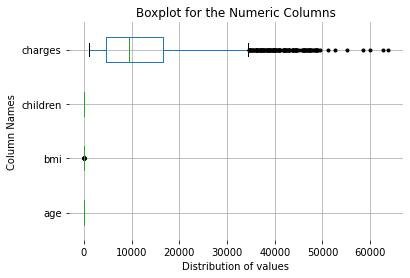

In [24]:
import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline
df_insure.boxplot(column= ["age", "bmi", "children", "charges"], vert=False, sym="k.")
plt.suptitle("")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

In [25]:
len(df_insure[df_insure["charges"] > 50000])

7

In [26]:
df_insure[df_insure["charges"] > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [27]:
df_insure = df_insure[df_insure["charges"] <= 50000]
print(f"The dimension of our dataset: {df_insure.shape}")

The dimension of our dataset: (1330, 7)


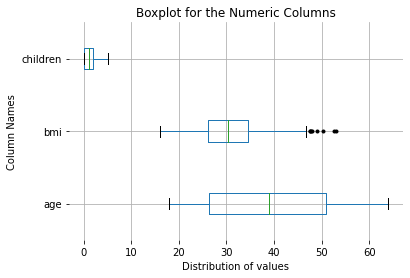

In [28]:
df_insure.boxplot(column= ["age", "bmi", "children"], vert=False, sym="k.")
plt.title("Boxplot for the Numeric Columns")
plt.xlabel("Distribution of values")
plt.ylabel("Column Names")
plt.box(False)

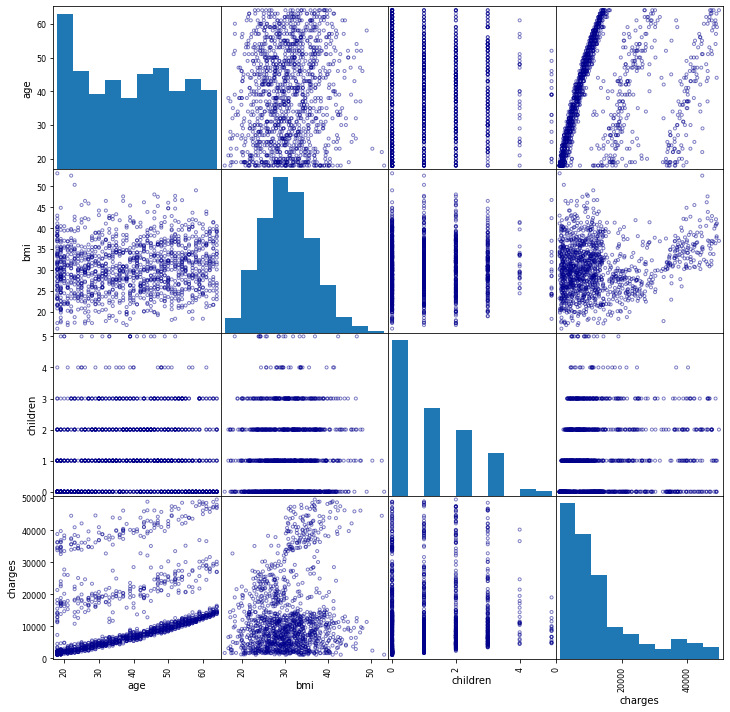

In [29]:
_ = pd.plotting.scatter_matrix(df_insure, figsize = (12,12), c = "none", edgecolor = "darkblue")

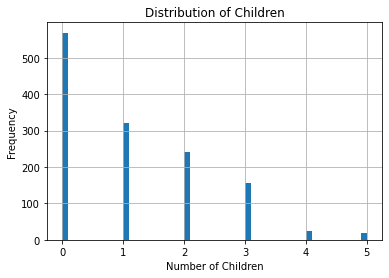

In [30]:
df_insure.children.hist(bins=50)
plt.title("Distribution of Children")
plt.ylabel("Frequency")
plt.xlabel("Number of Children")
plt.show()

<AxesSubplot:>

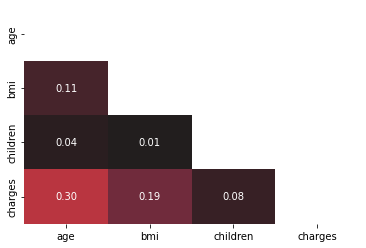

In [31]:
import numpy as np
sns.heatmap(df_insure.corr(), vmin = -0.3, vmax = 0.6, center = 0, annot = True, fmt = ".2f",
            mask = ~np.tri(df_insure.corr().shape[1], k = -1, dtype = bool), cbar = False)

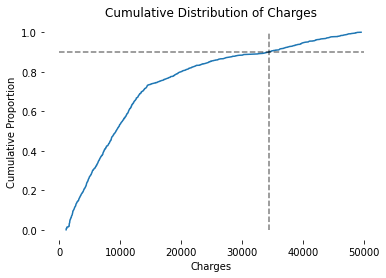

In [32]:
from statsmodels.distributions.empirical_distribution import ECDF
e = ECDF(df_insure.charges)
plt.subplot(1, 1, 1)
plt.plot(e.x, e.y)
plt.title("Cumulative Distribution of Charges")
plt.ylabel("Cumulative Proportion")
plt.xlabel("Charges")
plt.plot([0, 50000], [0.9, 0.9], "k--", alpha=0.5)
plt.plot([df_insure.charges.quantile(.9), df_insure.charges.quantile(.9)], [0, 1], "k--", alpha=0.5)
plt.box(False)

Text(0.5, 1.0, 'Region Distribution')

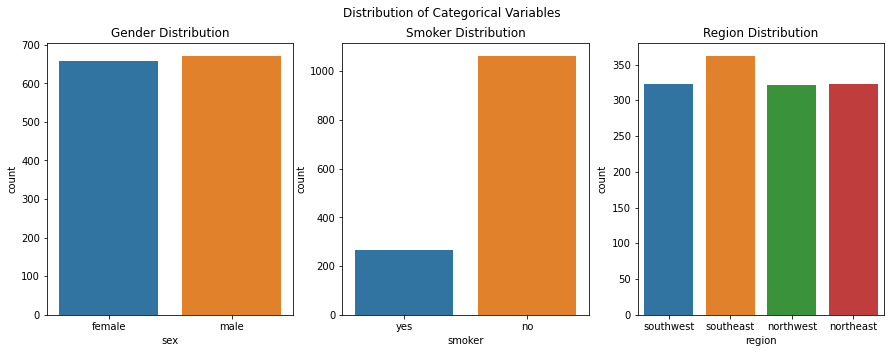

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Distribution of Categorical Variables")

sns.countplot(ax=axes[0], x=df_insure.sex)
axes[0].set_title("Gender Distribution")

sns.countplot(ax=axes[1], x=df_insure.smoker)
axes[1].set_title("Smoker Distribution")

sns.countplot(ax=axes[2], x=df_insure.region)
axes[2].set_title("Region Distribution")

Text(0.5, 1.0, 'Region vs Charges')

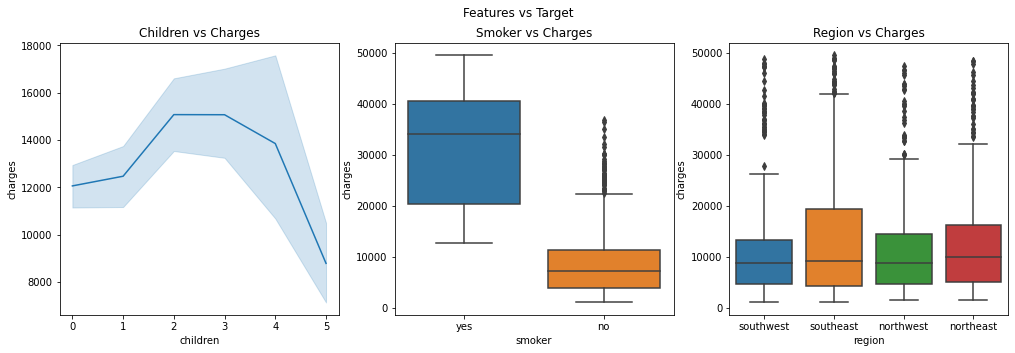

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
fig.suptitle("Features vs Target")

sns.lineplot(ax=axes[0], x=df_insure.children, y=df_insure.charges)
axes[0].set_title("Children vs Charges")

sns.boxplot(ax=axes[1], x=df_insure.smoker, y=df_insure.charges)
axes[1].set_title("Smoker vs Charges")

sns.boxplot(ax=axes[2], x=df_insure.region, y=df_insure.charges)
axes[2].set_title("Region vs Charges")

In [35]:
df_insure.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
print("Original features:\n", list(df_insure.columns), "\n")
data_dummies = pd.get_dummies(df_insure[["age", "bmi", "children", "region", "charges"]])
data_dummies["sex"] = df_insure["sex"].apply(lambda x: 1 if x == "male" else 0)
data_dummies["smoker"] = df_insure["smoker"].apply(lambda x: 1 if x == "yes" else 0)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'] 

Features after get_dummies:
 ['age', 'bmi', 'children', 'charges', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex', 'smoker']


In [37]:
print(f"Dimensions: {data_dummies.shape}\n")
print(data_dummies.head())

Dimensions: (1330, 10)

   age     bmi  children      charges  region_northeast  region_northwest  \
0   19  27.900         0  16884.92400                 0                 0   
1   18  33.770         1   1725.55230                 0                 0   
2   28  33.000         3   4449.46200                 0                 0   
3   33  22.705         0  21984.47061                 0                 1   
4   32  28.880         0   3866.85520                 0                 1   

   region_southeast  region_southwest  sex  smoker  
0                 0                 1    0       1  
1                 1                 0    1       0  
2                 1                 0    1       0  
3                 0                 0    1       0  
4                 0                 0    1       0  


In [38]:
from sklearn.preprocessing import StandardScaler
scaled_df = data_dummies.copy()
scaler = StandardScaler()
scaled_df[["age", "bmi", "children"]] = scaler.fit_transform(scaled_df[["age", "bmi", "children"]])
print(f"Dimensions: {scaled_df.shape}\n")
print(scaled_df.head())

Dimensions: (1330, 10)

        age       bmi  children      charges  region_northeast  \
0 -1.438072 -0.448866 -0.910496  16884.92400                 0   
1 -1.509261  0.515202 -0.081072   1725.55230                 0   
2 -0.797370  0.388740  1.577778   4449.46200                 0   
3 -0.441425 -1.302075 -0.910496  21984.47061                 0   
4 -0.512614 -0.287915 -0.910496   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  sex  smoker  
0                 0                 0                 1    0       1  
1                 0                 1                 0    1       0  
2                 0                 1                 0    1       0  
3                 1                 0                 0    1       0  
4                 1                 0                 0    1       0  


In [39]:
scaled_df.columns

Index(['age', 'bmi', 'children', 'charges', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest', 'sex',
       'smoker'],
      dtype='object')

In [40]:
features = scaled_df[["age", "bmi", "children", "region_northeast", "region_northwest",
                      "region_southeast", "region_southwest", "sex", "smoker"]]

X = features.values
y = scaled_df["charges"].values
print(f"X.shape: {X.shape} y.shape: {y.shape}")

X.shape: (1330, 9) y.shape: (1330,)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [43]:
pred = reg.predict(X_test)

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
y_pred = regressor.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"R-squared: {r2_score(y_test, pred)}")

RMSE: 5832.496449208682
MAE: 3992.959902058583
R-squared: 0.7592463982942959


In [47]:
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

RMSE: 5961.915848208806
MAE: 2641.7489615
R-squared: 0.7484435193153858


In [48]:
scores = {"Model": ["Linear", "Decision Tree"],
          "MAE": [mean_absolute_error(y_test, pred), mean_absolute_error(y_test, y_pred)],
          "RMSE": [np.sqrt(mean_squared_error(y_test, pred)), np.sqrt(mean_squared_error(y_test, y_pred))],
          "R-squared": [r2_score(y_test, pred), r2_score(y_test, y_pred)]}
pd.DataFrame(scores)

,Model,MAE,RMSE,R-squared
0,Linear,3992.959902,5832.496449,0.759246
1,Decision Tree,2641.748961,5961.915848,0.748444
